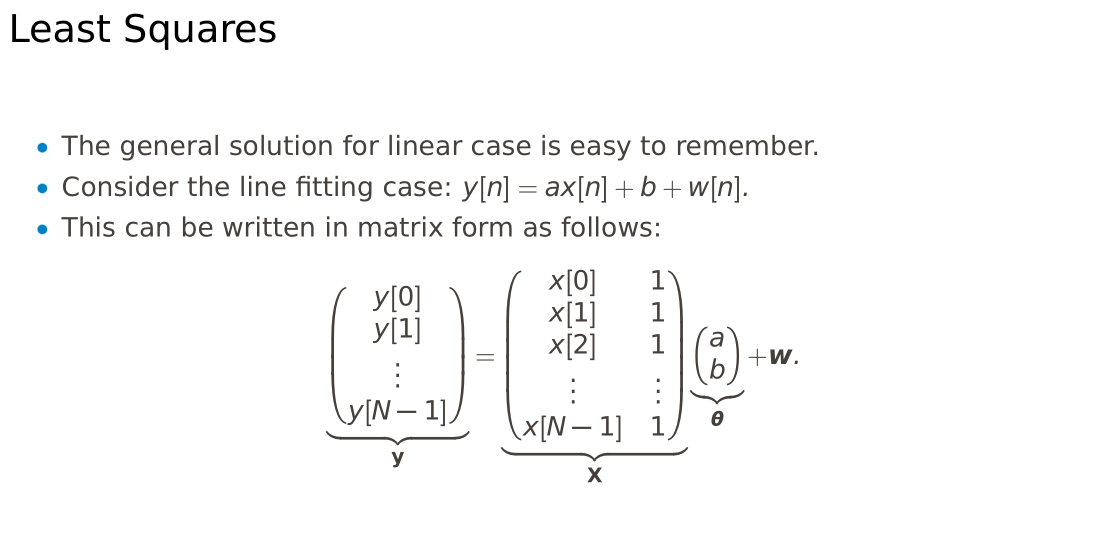

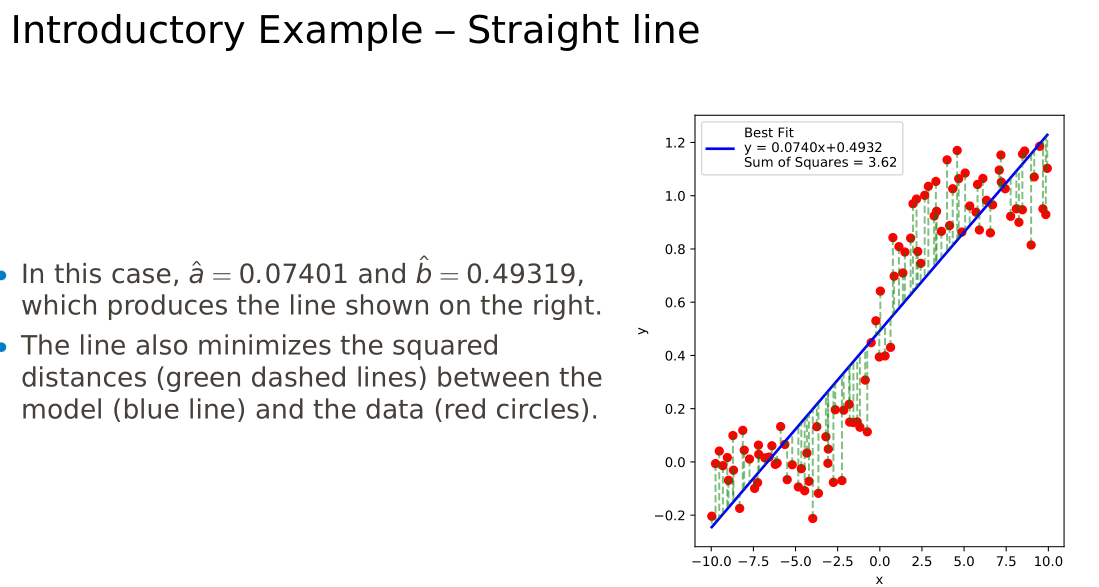

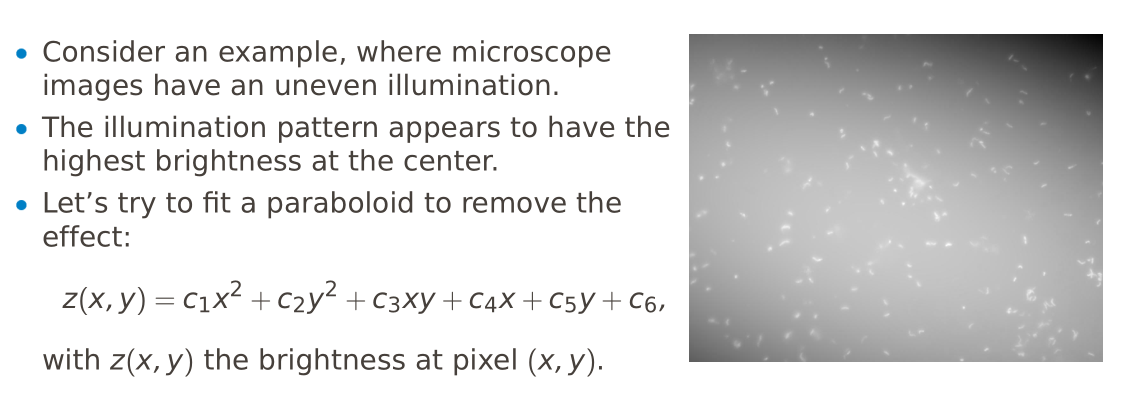

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2


img = cv2.imread("imagen.png",0)
img = np.array(img)

print(img)

[[108 109 109 ...   5   5   4]
 [109 110 110 ...   7   6   5]
 [110 111 111 ...   7   7   6]
 ...
 [ 96  97  97 ... 152 152 152]
 [ 95  96  96 ... 152 152 152]
 [ 95  96  96 ... 151 151 151]]


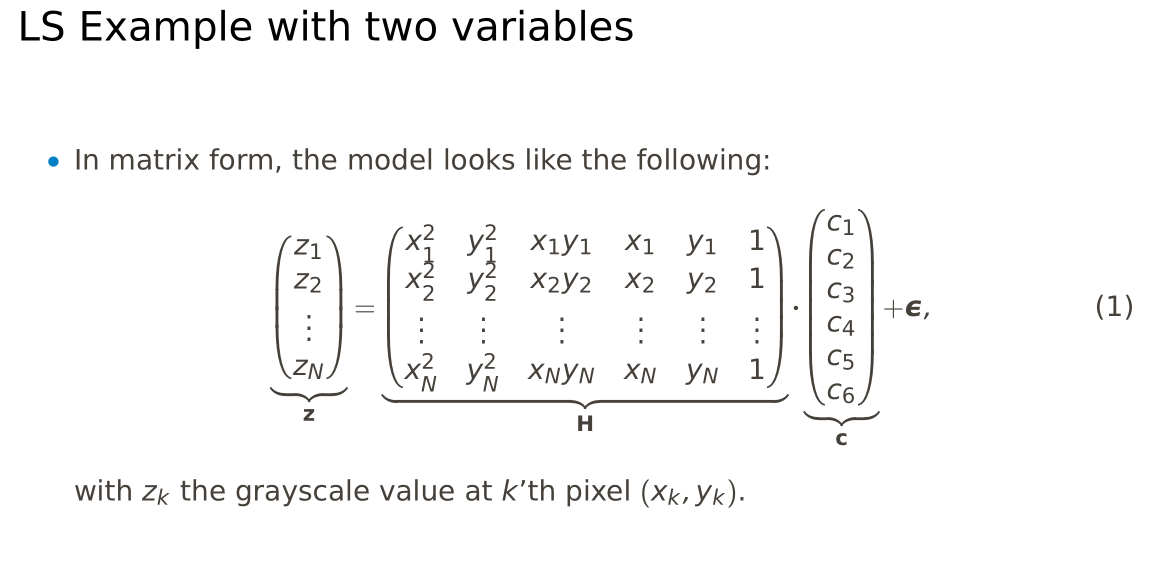

In [2]:
len_x = img.shape[0]
len_y = img.shape[1]

z = img.flatten()
z = z.reshape((len(z),1))
y = np.array([ i for i in range(len_y) ]*len_x)
x = np.array([ [i]*len_y for i in range(len_x)  ])
x = x.flatten()
print(len(z))
print(len(y))
print(len(x))

268763
268763
268763


In [3]:
print(x)

[  0   0   0 ... 460 460 460]


In [4]:
print(y)

[  0   1   2 ... 580 581 582]


In [5]:
print(z)

[[108]
 [109]
 [109]
 ...
 [151]
 [151]
 [151]]


In [6]:
xx = np.power(x, 2)
yy = np.power(y, 2)
xy = x*y
ones = np.ones(len(z))
H = np.array([ xx, yy, xy, x, y, ones ])
H = H.T
H

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00],
       [0.00000e+00, 4.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        1.00000e+00],
       ...,
       [2.11600e+05, 3.36400e+05, 2.66800e+05, 4.60000e+02, 5.80000e+02,
        1.00000e+00],
       [2.11600e+05, 3.37561e+05, 2.67260e+05, 4.60000e+02, 5.81000e+02,
        1.00000e+00],
       [2.11600e+05, 3.38724e+05, 2.67720e+05, 4.60000e+02, 5.82000e+02,
        1.00000e+00]])

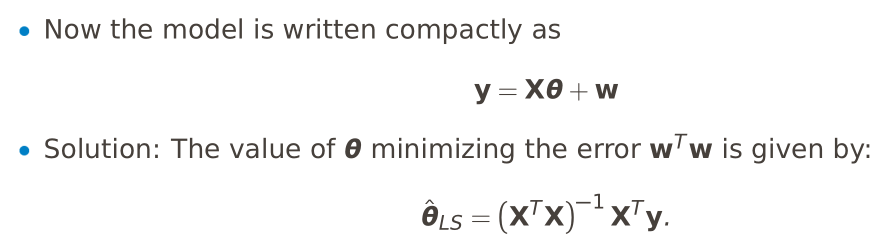

In [7]:
c = np.dot(H.T, H)
c = np.linalg.inv(c) 
c = np.dot(c, H.T)
c = np.dot(c, z)

In [8]:
z_fit = np.dot(H, c)
z_fit = z_fit.reshape((len_x, len_y))
z_fit

array([[109.70342382, 109.75181782, 109.79942919, ...,   6.36201774,
          5.95649145,   5.55018253],
       [110.31685997, 110.36585497, 110.41406734, ...,   7.32403534,
          6.91911005,   6.51340214],
       [110.92749584, 110.97709184, 111.02590521, ...,   8.28325266,
          7.87892838,   7.47382147],
       ...,
       [ 97.59951755,  97.92317069,  98.24604122, ..., 153.90841733,
        153.77815019, 153.64710042],
       [ 96.93042564,  97.25467978,  97.57815131, ..., 153.58790687,
        153.45824073, 153.32779197],
       [ 96.25853345,  96.58338859,  96.90746112, ..., 153.26459613,
        153.13553099, 153.00568323]])

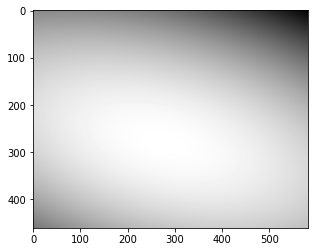

In [9]:
plt.imshow(z_fit, cmap='gray')

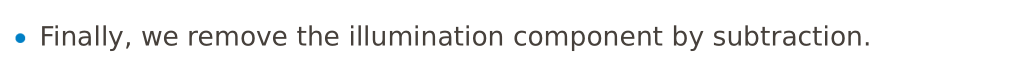

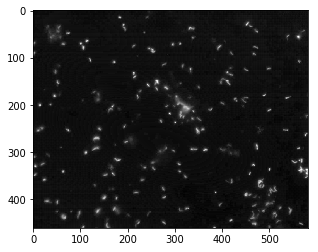

In [10]:
plt.imshow(img-z_fit, cmap='gray')

Source: https://github.com/mahehu/SGN-41007